In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/restaurant_menu_optimization_data.csv')
print(data.head())

  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


In [7]:
df=data.drop(columns=['RestaurantID'])
df

,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,Beverages,Soda,['confidential'],2.55,Low
1,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...
995,Beverages,Soda,['confidential'],2.16,Low
996,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [8]:
df.duplicated().sum()

50

In [9]:
df=df.drop_duplicates()

In [12]:
#encoding
le = LabelEncoder()

df['MenuCategory'] = le.fit_transform(df['MenuCategory'])
df['MenuItem'] = le.fit_transform(df['MenuItem'])
df['Ingredients'] = le.fit_transform(df['Ingredients'])
df['Profitability'] = le.fit_transform(df['Profitability'])

In [13]:
#split
#target column
target_column = 'Profitability'

X = df.drop(columns=[target_column]) # -> features all features without target
y = df[target_column]

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest:
Accuracy Score: 0.8736842105263158
Confusion Matrix:
 [[62  5  7]
 [ 2 13  3]
 [ 4  3 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        74
           1       0.62      0.72      0.67        18
           2       0.90      0.93      0.91        98

    accuracy                           0.87       190
   macro avg       0.81      0.83      0.82       190
weighted avg       0.88      0.87      0.87       190



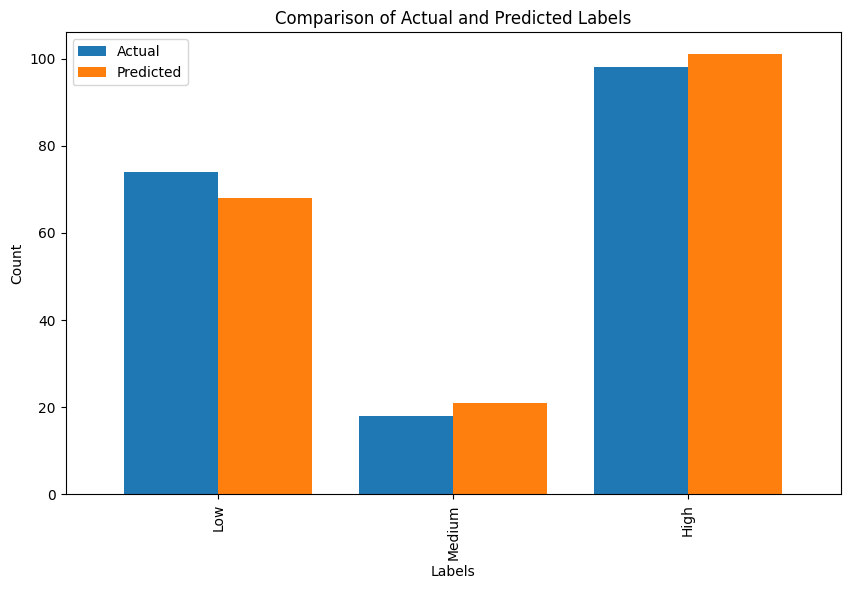

In [17]:
actual_labels = y_test
predicted_labels = y_pred_random_forest

# Calculate counts of each label
actual_counts = pd.Series(actual_labels).value_counts().sort_index()
predicted_counts = pd.Series(predicted_labels).value_counts().sort_index()

# Create a DataFrame to align actual and predicted counts for plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

# Plotting
ax = comparison_df.plot(kind='bar', width=0.8, figsize=(10, 6))

# Customizing x-axis labels to match the actual label names
ax.set_xticklabels(['Low', 'Medium', 'High'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.legend()
plt.show()

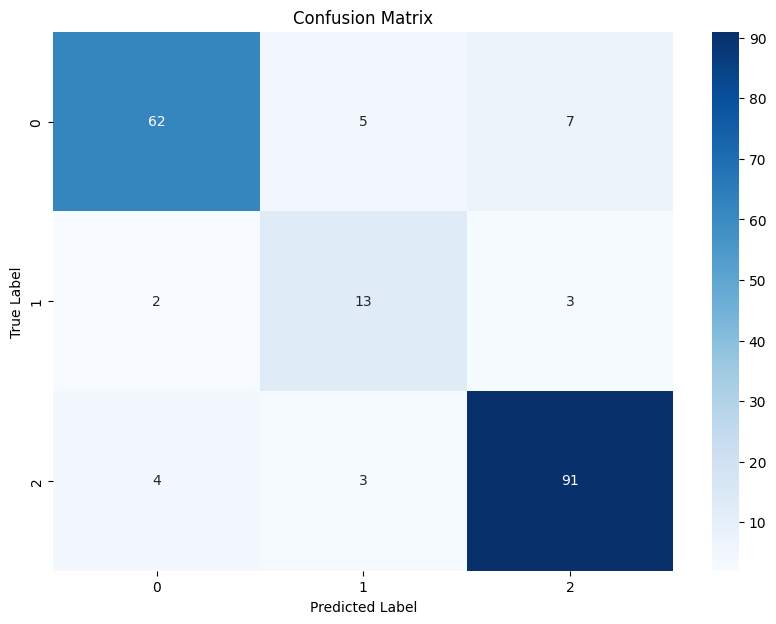

In [19]:
 #Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_random_forest, labels=random_forest.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()